## **투빅스 16기 정규세션 Week2 Regression - 16기 김윤혜**

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [137]:
# Load Data 
data = pd.read_csv("Tobigs/정규세션/week2/Regression/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


* categorical(5): "Name", "Location", "Fuel_Type", "Transmission", "Owner_Type" <br>
* numerical(8): "Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "New_Price", "Price"

In [138]:
data.drop(['Unnamed: 0', 'Name'], axis=1, inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  New_Price          824 non-null    object 
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


Mileage, Engine, Power, New_Price 변수는 수치형 변수이지만 단위(문자열)이 붙어있기 때문에 object type으로 출력되었다.

## 전처리

* 단위 제거

In [141]:
# Mileage
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
# Engine
data['Engine'] = data['Engine'].str.replace(" CC","")
# Power
data['Power'] = data['Power'].str.replace(" bhp","")
# New_Price
data['New_Price'] = data['New_Price'].str.replace(" Lakh","")

* 단위 변환
    - New_Price
    - 1Lakh: 100,000
    - 1Cr(Crore): 10,000,000
    - Cr → Lakh

In [142]:
Cr2Lakh = (data[data['New_Price'].str.contains(' Cr')==True])['New_Price']
Cr2Lakh_idx = Cr2Lakh.index.tolist()
Cr2Lakh = Cr2Lakh.str.replace(" Cr", "")
data.loc[data['New_Price'].str.contains('Cr')==True,'New_Price'] = pd.to_numeric(Cr2Lakh)*100
# data.loc[Cr2Lakh_idx]['New_Price']

* numerical type 변환

In [143]:
data["Power"][79]

'null'

In [144]:
data = data.replace({'Power': 'null'}, {'Power': np.nan})

In [145]:
data["Power"][79]

nan

In [146]:
data[['Mileage','Engine','Power', 'New_Price']] = data[['Mileage','Engine','Power', 'New_Price']].apply(pd.to_numeric)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Seats              5977 non-null   float64
 10  New_Price          824 non-null    float64
 11  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 564.4+ KB


numerical과 categorical features가 8개와 5개로 잘 변환된 것을 확인할 수 있다.

* **결측치 처리**

In [159]:
def null_check(df):
    null = df.isnull().sum()
    
    null_col=[]

    for i in range(len(df.columns)):
        if (null[i]!=0):
            print(null.index[i],null[i],'개,',round(null[i]/len(data)*100,2), '%')
            null_col.append(null.index[i])
            
    if len(null_col) == 0:
        print("결측치 없음")

In [160]:
null_check(data)

Mileage 2 개, 0.03 %
Engine 36 개, 0.6 %
Power 143 개, 2.38 %
Seats 42 개, 0.7 %
New_Price 5195 개, 86.31 %


**결측치가 무려 86%인 변수 New_Price 삭제**

In [162]:
df = data.drop(['New_Price'],axis='columns',inplace=False)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


**Null값을 평균값으로 변환**

In [163]:
null_features = ['Mileage', 'Engine', 'Power', 'Seats']

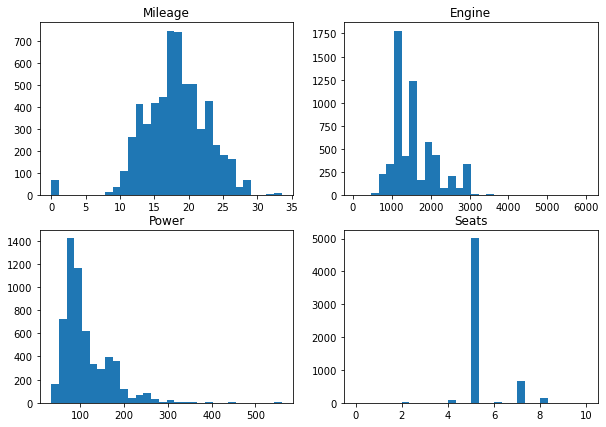

In [164]:
plt.figure(figsize = (10, 7))

for i,feature in enumerate(null_features):
    plt.subplot(2,2,i+1)
    plt.title(feature)
    plt.hist(df[feature], bins=30)

In [165]:
null_features_mean = df[null_features].mean()
null_features_mean

Mileage      18.134961
Engine     1621.276450
Power       113.253050
Seats         5.278735
dtype: float64

In [166]:
df = df.fillna(df.mean())

In [167]:
null_check(df)

결측치 없음


결측치를 평균값으로 대치하였다.

* 이상치 처리

In [168]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [169]:
zero_features = ['Mileage', 'Seats']

data_count = df['Mileage'].count() 

for feature in zero_features:
    zero_count = data[data[feature] == 0][feature].count()
    print('%s의 0 비율: %.2f %%' %(feature, zero_count/data_count*100))

Mileage의 0 비율: 1.13 %
Seats의 0 비율: 0.02 %


In [170]:
df[zero_features] = df[zero_features].replace(0, df[zero_features].mean())

Mileage(연비)와 Seats(인승)의 최소값이 0일 수 없기 때문에 0은 평균값으로 처리하였다.

* **범주형 변수 factor화**

In [173]:
categorical = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]
# numerical = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "Price"]

In [174]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical:
    df[col] = encoder.fit_transform(data[col].values)

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


* **Z-score 정규화(Standard Scale)와 One-Hot Encoding 적용**

In [175]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dat_num_scaled = pd.DataFrame(scaler.fit_transform(dat[numerical]),columns=num_att_x)
dat_num_scaled

dat_extra = dat.drop(num_att_x, axis=1)
dat = pd.concat([dat_num_scaled,dat_extra],axis=1)

In [264]:
def pipeline(df, nums, cats):
    
    num_pipeline=Pipeline([
        ("select_numeric",DataFrameSelector(nums)),
        ("scaler", StandardScaler())])

    cat_pipeline = Pipeline([
        ("select_cat",DataFrameSelector(cats))])
        #("encoder", OneHotEncoder())])
    
    preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)])
    
    X=pd.DataFrame(preprocess_pipeline.fit_transform(df), columns=nums+cats)
    
    return X

In [177]:
categorical = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]
numerical = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats"]

In [265]:
X_data = pipeline(df,numerical,categorical)

In [267]:
X_data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location,Fuel_Type,Transmission,Owner_Type
0,-1.027139,0.145315,1.989999,-1.039653,-1.035066,-0.348180,9.0,0.0,1.0,0.0
1,0.502161,-0.194369,0.320456,-0.065515,0.243242,-0.348180,10.0,1.0,1.0,0.0
2,-0.721279,-0.139581,-0.033690,-0.704376,-0.461293,-0.348180,2.0,4.0,1.0,0.0
3,-0.415419,0.309678,0.585463,-0.622642,-0.460166,2.142271,2.0,1.0,1.0,0.0
4,-0.109559,-0.197985,-0.756436,0.578351,0.517541,-0.348180,3.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6014,0.196301,-0.343775,2.423647,-0.622642,-0.737471,-0.348180,4.0,1.0,1.0,0.0
6015,0.502161,0.452126,1.459986,-0.836152,-0.793833,-0.348180,6.0,1.0,1.0,0.0
6016,-0.415419,-0.040963,-1.045535,1.462415,-0.023542,3.387496,6.0,1.0,1.0,2.0
6017,-0.109559,-0.139581,0.134951,-1.039653,-0.867105,-0.348180,8.0,4.0,1.0,0.0


In [269]:
y_data = df['Price']

* **데이터 분할**

In [316]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_data, y_data, test_size=0.2,random_state=0)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
# X_test = np.asarray(X_test)
# y_test = np.asarray(y_test)

In [317]:
print('Train data shape: {0}'.format(X_train.shape))
print('Test data shape: {0}'.format(X_test.shape))

Train data shape: (4815, 10)
Test data shape: (1204, 10)


## **회귀분석의 오차 가정 확인**

In [272]:
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [273]:
X_train=sm.add_constant(X_train) #beta_0 값이 될 변수 만들기
model=sm.OLS(y_train,X_train,axis=1)
trained_model=model.fit()

### 1. 선형성

Text(0, 0.5, 'residuals')

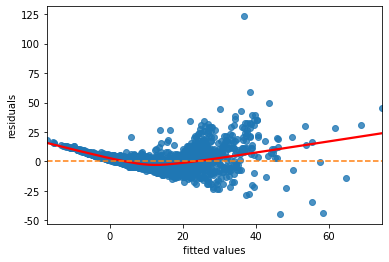

In [274]:
fitted = trained_model.fittedvalues

sns.regplot(fitted, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--')
plt.xlabel("fitted values")
plt.ylabel("residuals")

**잔차의 추세(빨간 실선)가 점선에서 크게 벗어나지 않기 때문에 선형성이 있다.**

### 2. 정규성

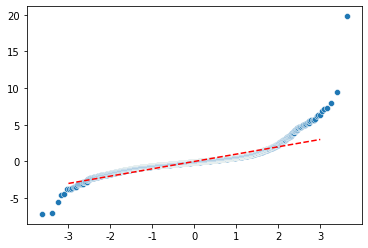

In [275]:
residuals=trained_model.resid
sr = scipy.stats.zscore(residuals)
(x, y), _ = stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='red')

In [276]:
scipy.stats.shapiro(residuals)[1]

0.0

**파란색 점들이 빨간색 점선에 크게 벗어나지 않고 형성되고 샤피로 검정의 유의수준이 0.05보다 작기 때문에 오차의 정규성은 성립한다.**

### 3. 등분산성

(-1.0, 4.0)

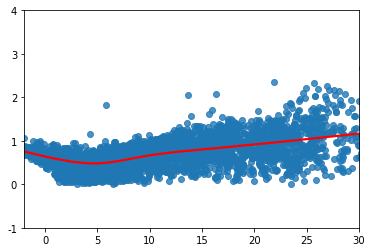

In [277]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})
plt.xlim(-2,30)
plt.ylim(-1,4)

**빨간색 실선이 완벽하진 않지만 수평선에 가까우므로 등분산성이 있다.**

### 4. 독립성

In [278]:
trained_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1089.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:43:46   Log-Likelihood:                -15634.
No. Observations:                4815   AIC:                         3.129e+04
Df Residuals:                    4804   BIC:                         3.136e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.1900      0.329     43.114      0.000      13.545      14.835
Year                  3.3352      0.106     31.325      0.000       3.126       3.544
Kilometers_Driven     0.1198      0.083      1.437      0.151      -0.044       0.283
Mileage              -0.5432      0.162     -3.349      0.001      -0.861      -0.225
Engine                1.1995      0.257      4.659      0.000       0.695       1.704
Power                 6.3665      0.226     28.162      0.000       5.923       6.810
Seats                -1.1019      0.123     -8.933      0.000      -1.344      -0.860
Location             -0.2318      0.031     -7.586      0.000      -0.292      -0.172
Fuel_Type            -0.6572      0.086     -7.678      0.000      -0.825      -0.489
Transmission         -2.5672      0.272     -9.449      0.000      -3.100      -2.035
Owner_Type           -0.0942      0.120     -0.787      0.431      -0.329       0.140
==============================================================================
Omnibus:                     3788.860   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           365091.846
Skew:                           3.101   Prob(JB):                         0.00
Kurtosis:                      45.205   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Durbin-Watson: 1.977로 2에 근접한 값이므로 독립성을 만족한다.**

R-squared: 0.694

* **p-value가 0.05보다 큰 변수 제거**

In [318]:
X_train = X_train.drop(["Kilometers_Driven","Owner_Type"],axis=1)
X_test = X_test.drop(["Kilometers_Driven","Owner_Type"],axis=1)
print(X_train.shape)
print(X_test.shape)

(4815, 8)
(1204, 8)


In [280]:
model=sm.OLS(y_train,X_train.drop(["Kilometers_Driven","Owner_Type"],axis=1))
model2=model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1360.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:44:18   Log-Likelihood:                -15636.
No. Observations:                4815   AIC:                         3.129e+04
Df Residuals:                    4806   BIC:                         3.135e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           14.1618      0.324     43.767   

R-squared: 0.694 <br>
성능에 변화는 없음.

## **다중공선성 확인**

In [282]:
X_data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location,Fuel_Type,Transmission,Owner_Type
Year,1.000000,-0.173048,0.291291,-0.051712,0.013895,0.011795,-0.020117,-0.129526,-0.097059,-0.386160
Kilometers_Driven,-0.173048,1.000000,-0.064275,0.091029,0.033419,0.084163,-0.042751,-0.102953,0.025663,0.079924
Mileage,0.291291,-0.064275,1.000000,-0.639867,-0.548585,-0.345550,0.010125,-0.153273,0.358682,-0.146051
Engine,-0.051712,0.091029,-0.639867,1.000000,0.859020,0.397366,-0.078302,-0.401013,-0.499082,0.048520
Power,0.013895,0.033419,-0.548585,0.859020,1.000000,0.100559,-0.064933,-0.263771,-0.638835,0.028608
Seats,0.011795,0.084163,-0.345550,0.397366,0.100559,1.000000,-0.037596,-0.297830,0.073794,0.003205
Location,-0.020117,-0.042751,0.010125,-0.078302,-0.064933,-0.037596,1.000000,0.115048,0.040174,-0.033889
Fuel_Type,-0.129526,-0.102953,-0.153273,-0.401013,-0.263771,-0.297830,0.115048,1.000000,0.125219,0.043017
Transmission,-0.097059,0.025663,0.358682,-0.499082,-0.638835,0.073794,0.040174,0.125219,1.000000,0.003002
Owner_Type,-0.386160,0.079924,-0.146051,0.048520,0.028608,0.003205,-0.033889,0.043017,0.003002,1.000000


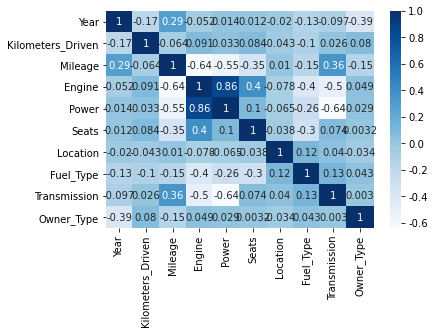

In [285]:
sns.heatmap(X_data.corr(), annot = True, cmap='Blues')
plt.show()

power와 Engine의 상관계수가 0.86으로 높은 것을 확인하였다.

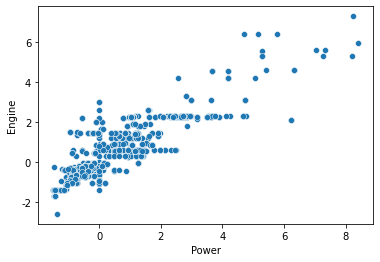

In [287]:
sns.scatterplot(x='Power', y='Engine', data=X_data)
plt.show()

양의 상관관계

In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [297]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]
vif["features"] = X_data.columns 
vif

,VIF Factor,features
0,1.401674,Year
1,1.052537,Kilometers_Driven
2,2.946444,Mileage
3,7.626789,Engine
4,6.004248,Power
5,1.853309,Seats
6,3.583118,Location
7,5.038132,Fuel_Type
8,4.518634,Transmission
9,1.390108,Owner_Type


하지만 모든 요소의 VIF가 10보다 작으므로 다중공선성이 존재한다고 하기 어려움.

## **회귀 분석**

In [323]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LR_train_pred = LR_model.predict(X_train)
LR_test_pred = LR_model.predict(X_test)

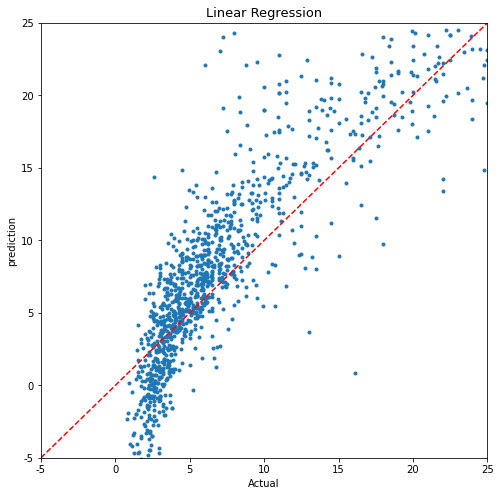

In [348]:
plt.figure(figsize=(8,8))

plt.plot(y_test, LR_test_pred, '.') # 예측 vs 실제 데이터 plot
plt.xlim(-5,25)
plt.ylim(-5,25)
plt.plot([-5,55],[-5,55],ls="--",c="red")

# plt.plot(x, y)
plt.xlabel('Actual')
plt.ylabel('prediction')
plt.title('Linear Regression', fontsize=13)
plt.show()

### 성능 평가

In [355]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [356]:
R_squared = LR_model.score(X_test, y_test)
MSE = mean_squared_error(y_test, LR_test_pred)

print('* R-squared:', round(R_squared,2))
print('* MSE:', round(MSE,2))
print('* RMSE:',round(np.sqrt(mean_squared_error(y_test,LR_test_pred)),2))
print('* MAE:', round(mean_absolute_error(y_test,LR_test_pred),2))
print('* MAPE:', round(mean_absolute_percentage_error(y_test,LR_test_pred),2))

* R-squared: 0.71
* MSE: 35.35
* RMSE: 5.95
* MAE: 3.69
* MAPE: 73.65
